In [2]:
import numpy as np
import matplotlib.pyplot as plt


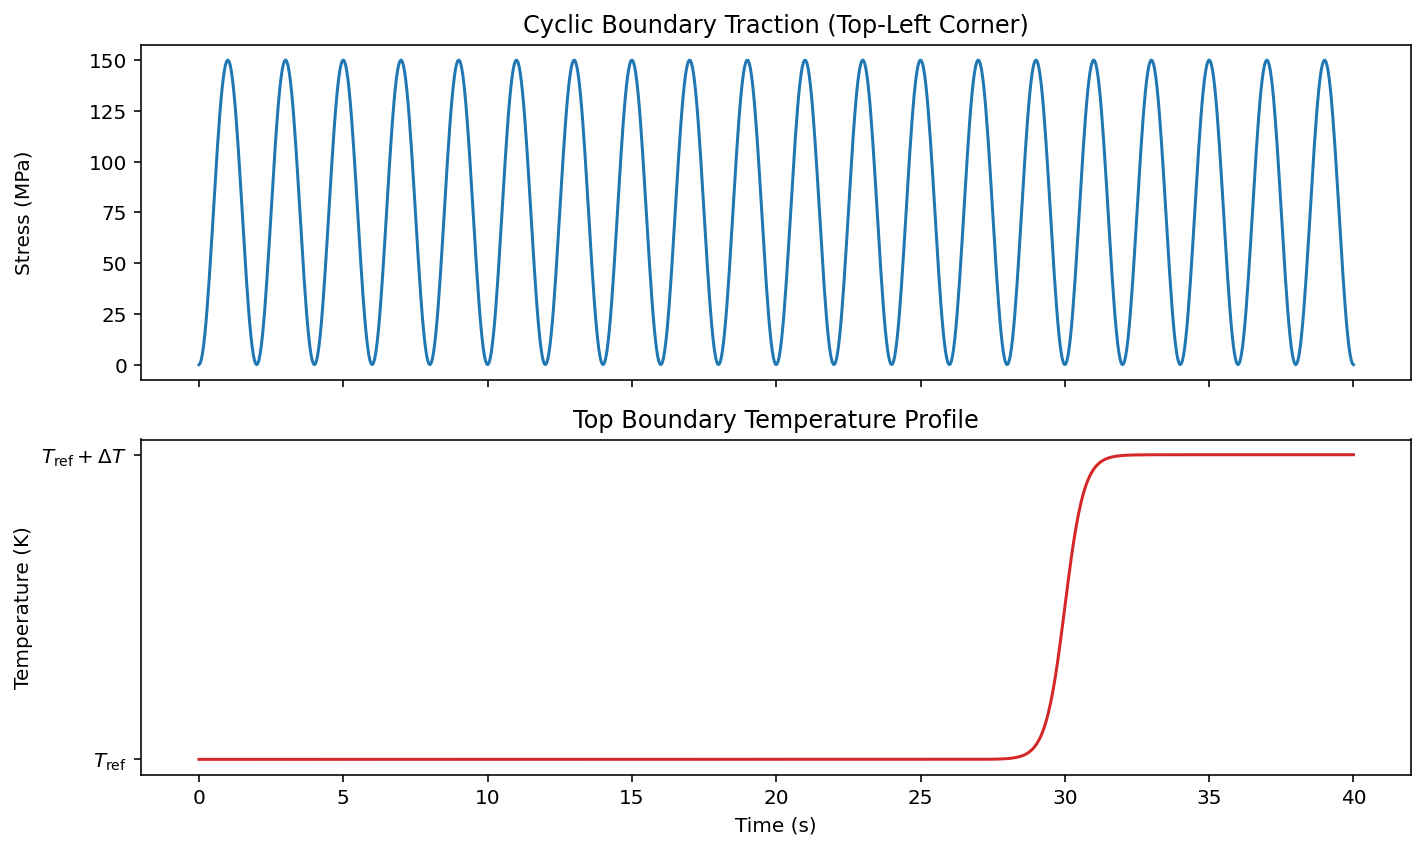

In [24]:

# Time settings
period = 2.0  # seconds per cycle
num_cycles = 20
total_time = period * num_cycles
t = np.linspace(0, total_time, 1000)

# Stress settings (cyclic surface traction)
stress_amplitude = 150  # MPa
stress = stress_amplitude * 0.5 * (1 - np.cos(2 * np.pi * t / period))

# Temperature boundary condition
T_ref = 300  # K
Delta_T_bc = 700  # K
temperature = T_ref + Delta_T_bc / (1 + np.exp(-3 * (t - 30)))

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True, dpi=144)

# Stress plot
axs[0].plot(t, stress, color='tab:blue')
axs[0].set_ylabel('Stress (MPa)')
axs[0].set_title('Cyclic Boundary Traction (Top-Left Corner)')
#axs[0].grid(True)

# Temperature plot
axs[1].plot(t, temperature, color='tab:red')
axs[1].set_ylabel('Temperature (K)')
axs[1].set_xlabel('Time (s)')
axs[1].set_title('Top Boundary Temperature Profile')
#axs[1].grid(True)
axs[1].set_yticks([T_ref, T_ref + Delta_T_bc])
axs[1].set_yticklabels([r'$T_{\mathrm{ref}}$', r'$T_{\mathrm{ref}} + \Delta T$'])

fig.align_ylabels(axs)

plt.tight_layout()
plt.savefig('thermal_shock.png')
plt.show()

In [11]:
def load_function(amplitude,period,t):
    return amplitude * (np.cos(2 * np.pi * (t+0.75*period) / period - np.pi/2) + 1) / 2

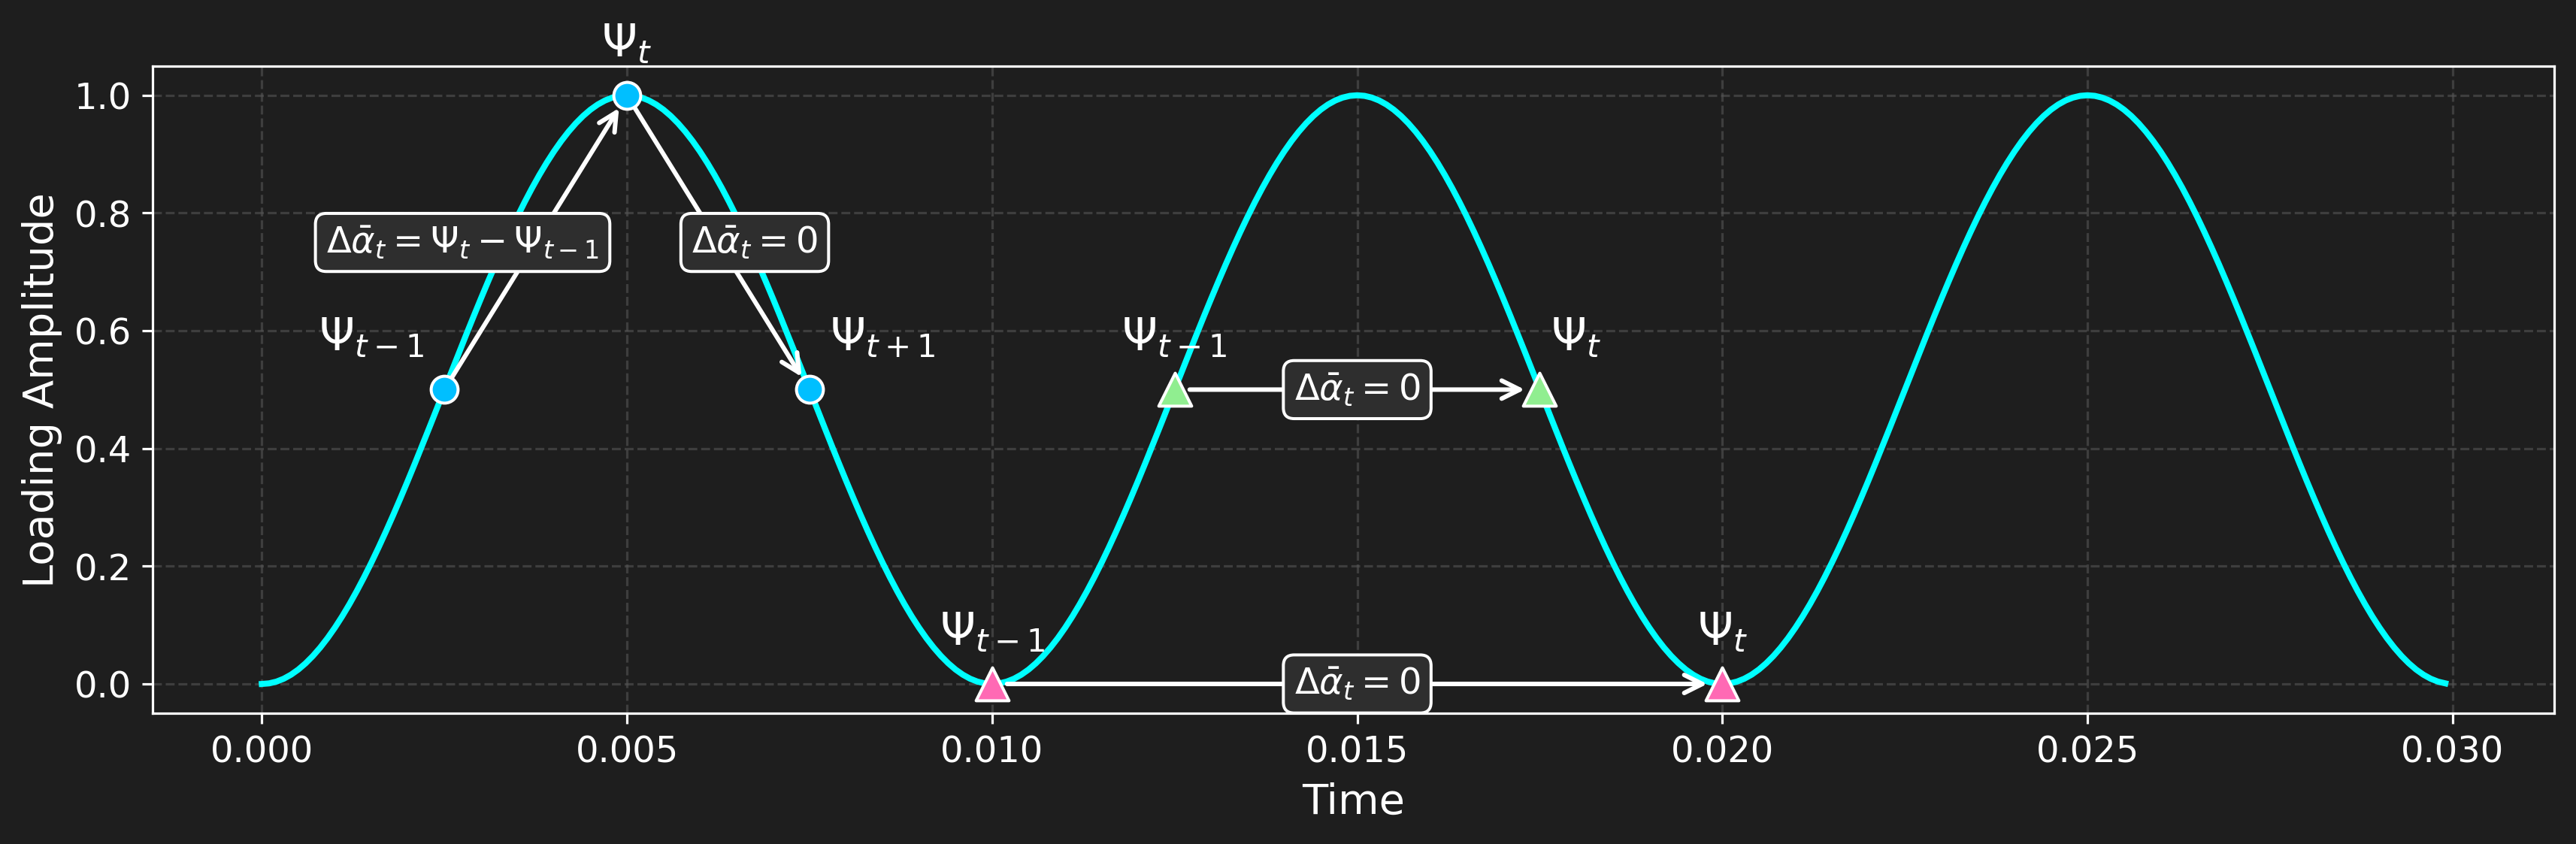

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# —— 資料定義 & 波形函數 —— 
period = 0.01           
amplitude = 1           
num_periods = 3         
points_per_period = 100  

def load_function(amplitude, period, t):
    return amplitude * (np.cos(2 * np.pi * (t + 0.75*period) / period - np.pi/2) + 1) / 2

t = np.linspace(0, num_periods * period, num_periods * points_per_period, endpoint=False)
load = load_function(amplitude, period, t)

# —— 第一部分標註點 —— 
t_label1 = np.array([0.0025, 0.005, 0.0075])
load1 = load_function(amplitude, period, t_label1)
texts1 = [r"$\Psi_{t-1}$", r"$\Psi_{t}$", r"$\Psi_{t+1}$"]
x_bias1 = [-0.001, 0, 0.001]
alplabel_pos1 = [-0.001, 0.0005]
delta1 = [r'$\Delta \bar\alpha_t = \Psi_{t}-\Psi_{t-1}$', r'$\Delta \bar\alpha_t = 0$']

# —— 第二部分分組 —— 
t_label2 = np.array([0.01, 0.02, 0.0125, 0.0175])
load2 = load_function(amplitude, period, t_label2)
texts2 = [r"$\Psi_{t-1}$", r"$\Psi_{t}$", r"$\Psi_{t-1}$", r"$\Psi_{t}$"]
groups = [
    {"idx": [0,1], "color": "hotpink",   "delta": r'$\Delta \bar\alpha_t = 0$'},
    {"idx": [2,3], "color": "lightgreen","delta": r'$\Delta \bar\alpha_t = 0$'}
]

# —— 繪圖 —— 
fig, ax = plt.subplots(figsize=(12, 4), dpi=288, facecolor='#1e1e1e')
ax.set_facecolor('#1e1e1e')

# 曲線
ax.plot(t, load, color='cyan', linewidth=2)

# 第一段標註與箭頭
for i, (x, y) in enumerate(zip(t_label1, load1)):
    ax.text(x + x_bias1[i], y + 0.05, texts1[i],
            fontsize=15, color='white', ha='center', va='bottom')
for i, (s, e) in enumerate(zip(t_label1[:-1], t_label1[1:])):
    y0, y1 = load1[i], load1[i+1]
    ax.annotate('', xy=(e, y1), xytext=(s, y0),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='white',
                                shrinkA=5, shrinkB=5, mutation_scale=15))
    mx, my = (s+e)/2, (y0+y1)/2
    ax.text(mx+alplabel_pos1[i], my, delta1[i],
            fontsize=12, color='white', ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#2e2e2e', edgecolor='white'))

# 標出 scatter
ax.scatter(t_label1, load1, s=80, edgecolor='white', c='deepskyblue', zorder=5)

# 分組 scatter + 箭頭
for gi, grp in enumerate(groups):
    ix = grp["idx"]
    ts = t_label2[ix]; ys = load2[ix]
    ax.scatter(ts, ys, s=120, edgecolor='white', c=grp["color"], marker='^', zorder=5)
    for j, idx in enumerate(ix):
        dx = [0, 0.0005][j] if gi==1 else 0
        ax.text(ts[j]+dx, ys[j]+0.05, texts2[idx],
                fontsize=15, color='white', ha='center', va='bottom')
    # 畫箭頭 & 標籤
    s, e = ts
    y0, y1 = ys
    ax.annotate('', xy=(e, y1), xytext=(s, y0),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='white',
                                shrinkA=5, shrinkB=5, mutation_scale=15))
    mx, my = (s+e)/2, (y0+y1)/2
    ax.text(mx, my, grp["delta"],
            fontsize=12, color='white', ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#2e2e2e', edgecolor='white'))

# 座標軸 & 網格
ax.set_xlabel('Time', fontsize=14, color='white')
ax.set_ylabel('Loading Amplitude', fontsize=14, color='white')
ax.grid(True, linestyle='--', alpha=0.6, color='#555555')
ax.tick_params(labelsize=12, colors='white')
for spine in ax.spines.values():
    spine.set_color('white')

plt.tight_layout()
plt.savefig('accumulation.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()


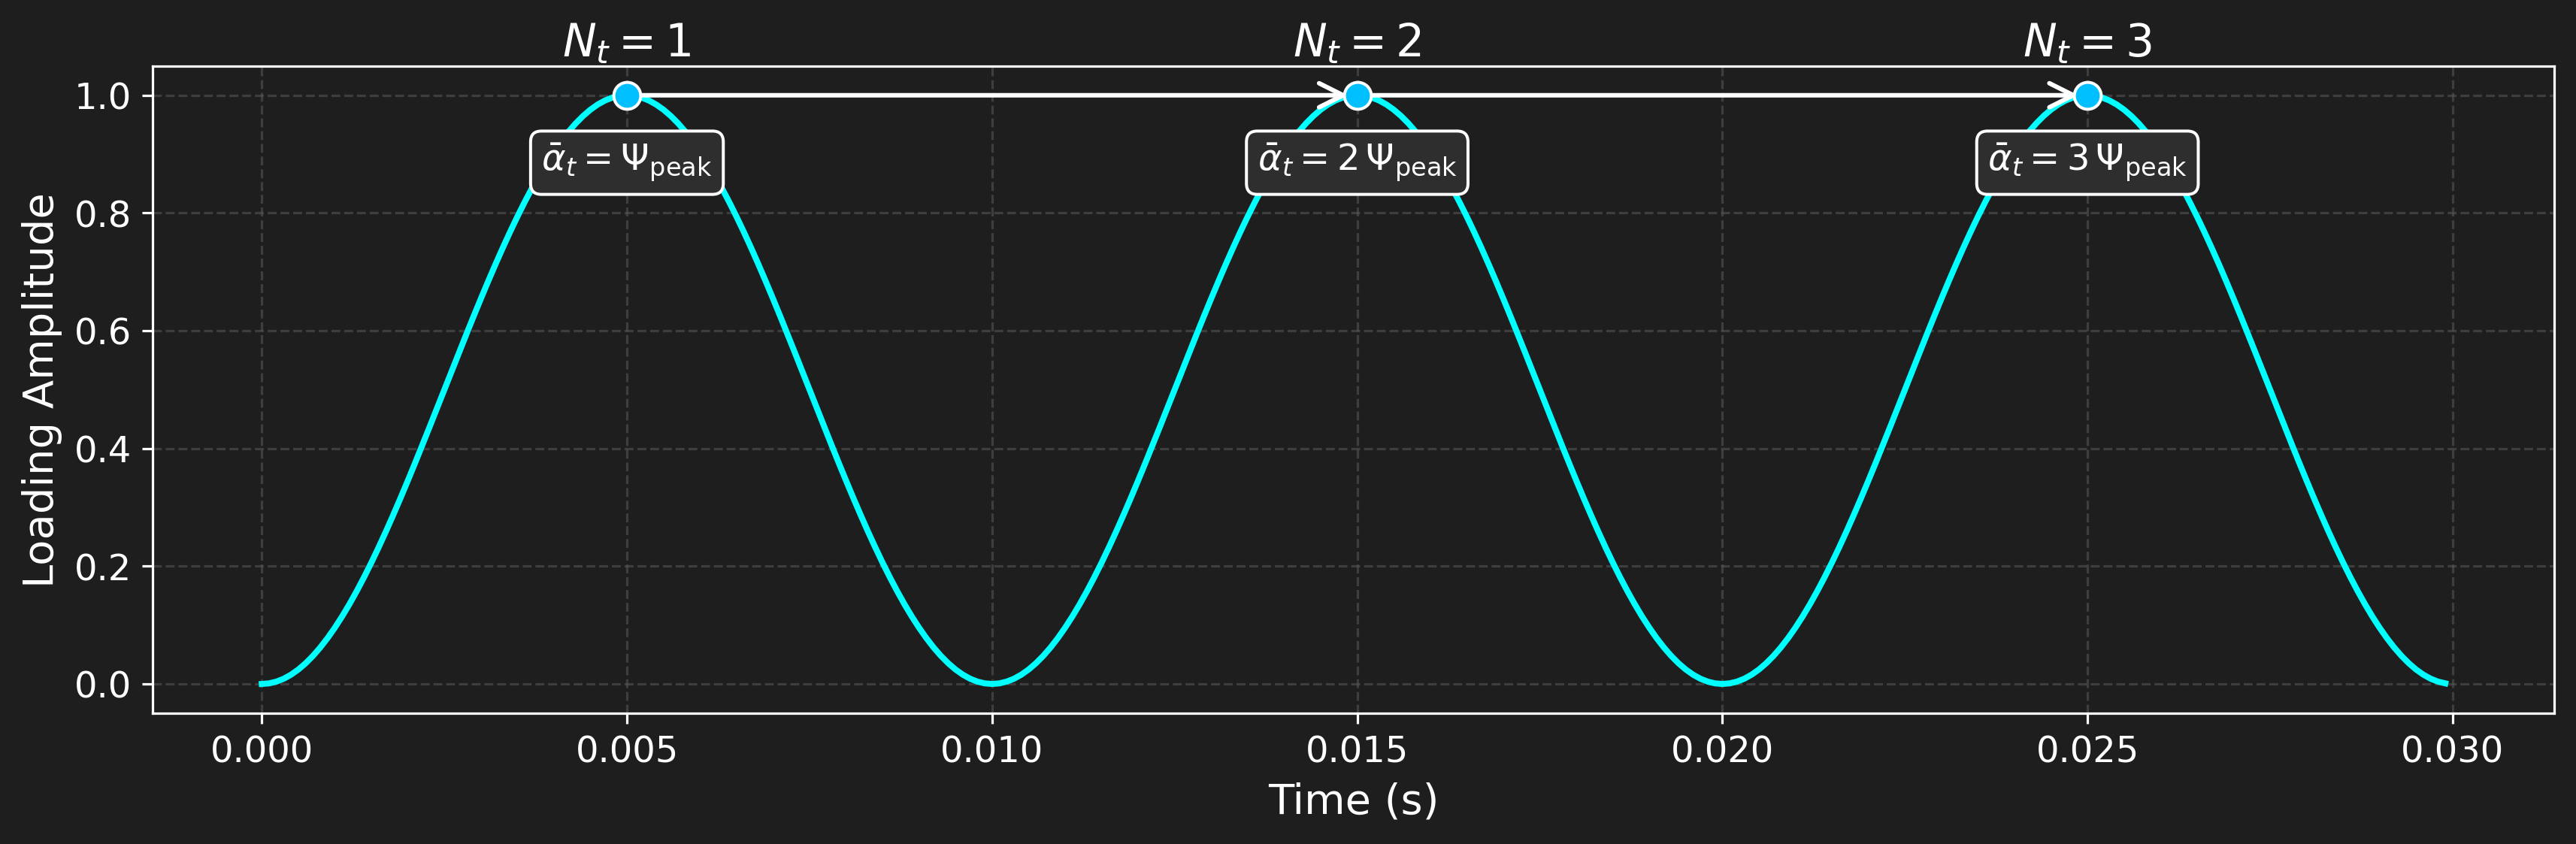

In [14]:
t_peaks = (np.arange(1, num_periods+1) - 0.5) * period
load_peaks = np.ones_like(t_peaks)

# —— 繪圖 —— 
fig, ax = plt.subplots(figsize=(12, 4), dpi=288, facecolor='#1e1e1e')
ax.set_facecolor('#1e1e1e')

# 曲線
ax.plot(t, load, color='cyan', linewidth=2)

# 峰值點
ax.scatter(t_peaks, load_peaks, s=80, edgecolor='white', c='deepskyblue', marker='o', zorder=5)

# N_t 標籤
for idx, (x, y) in enumerate(zip(t_peaks, load_peaks), start=1):
    ax.text(x, y+0.05, f'$N_t={idx}$', fontsize=15, color='white', ha='center', va='bottom')

# ᾱ 說明標籤
bar_alp = [
    r'$\bar\alpha_t = \Psi_{\mathrm{peak}}$',
    r'$\bar\alpha_t = 2\,\Psi_{\mathrm{peak}}$',
    r'$\bar\alpha_t = 3\,\Psi_{\mathrm{peak}}$'
]
for idx, (x, y) in enumerate(zip(t_peaks, load_peaks)):
    ax.text(x, y-0.15, bar_alp[idx],
            fontsize=12, color='white', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#2e2e2e', edgecolor='white'))

# —— 加回箭頭 —— 
for idx, (t0, t1) in enumerate(zip(t_peaks[:-1], t_peaks[1:])):
    y0, y1 = load_peaks[idx], load_peaks[idx+1]
    ax.annotate(
        '',
        xy=(t1, y1),
        xytext=(t0, y0),
        arrowprops=dict(
            arrowstyle='->',
            lw=1.5,
            shrinkA=3,
            shrinkB=3,
            mutation_scale=20,
            color='white'
        )
    )

# 座標軸 & 風格調整
ax.set_xlabel('Time (s)', fontsize=14, color='white')
ax.set_ylabel('Loading Amplitude', fontsize=14, color='white')
ax.grid(True, linestyle='--', alpha=0.6, color='#555555')
ax.tick_params(labelsize=12, colors='white')
for spine in ax.spines.values():
    spine.set_color('white')

plt.tight_layout()
plt.savefig('CLA.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

In [5]:
# 參數




def load_function_lin(amp_schedule, period, t):
    
    cycle_idx = np.floor(t/period).astype(int)
    
    cycle_idx = np.clip(cycle_idx, 0, len(amp_schedule)-1)
    
    A = amp_schedule[cycle_idx]
    
    return A * (np.cos(2*np.pi*(t+0.75*period)/period - np.pi/2) + 1) / 2



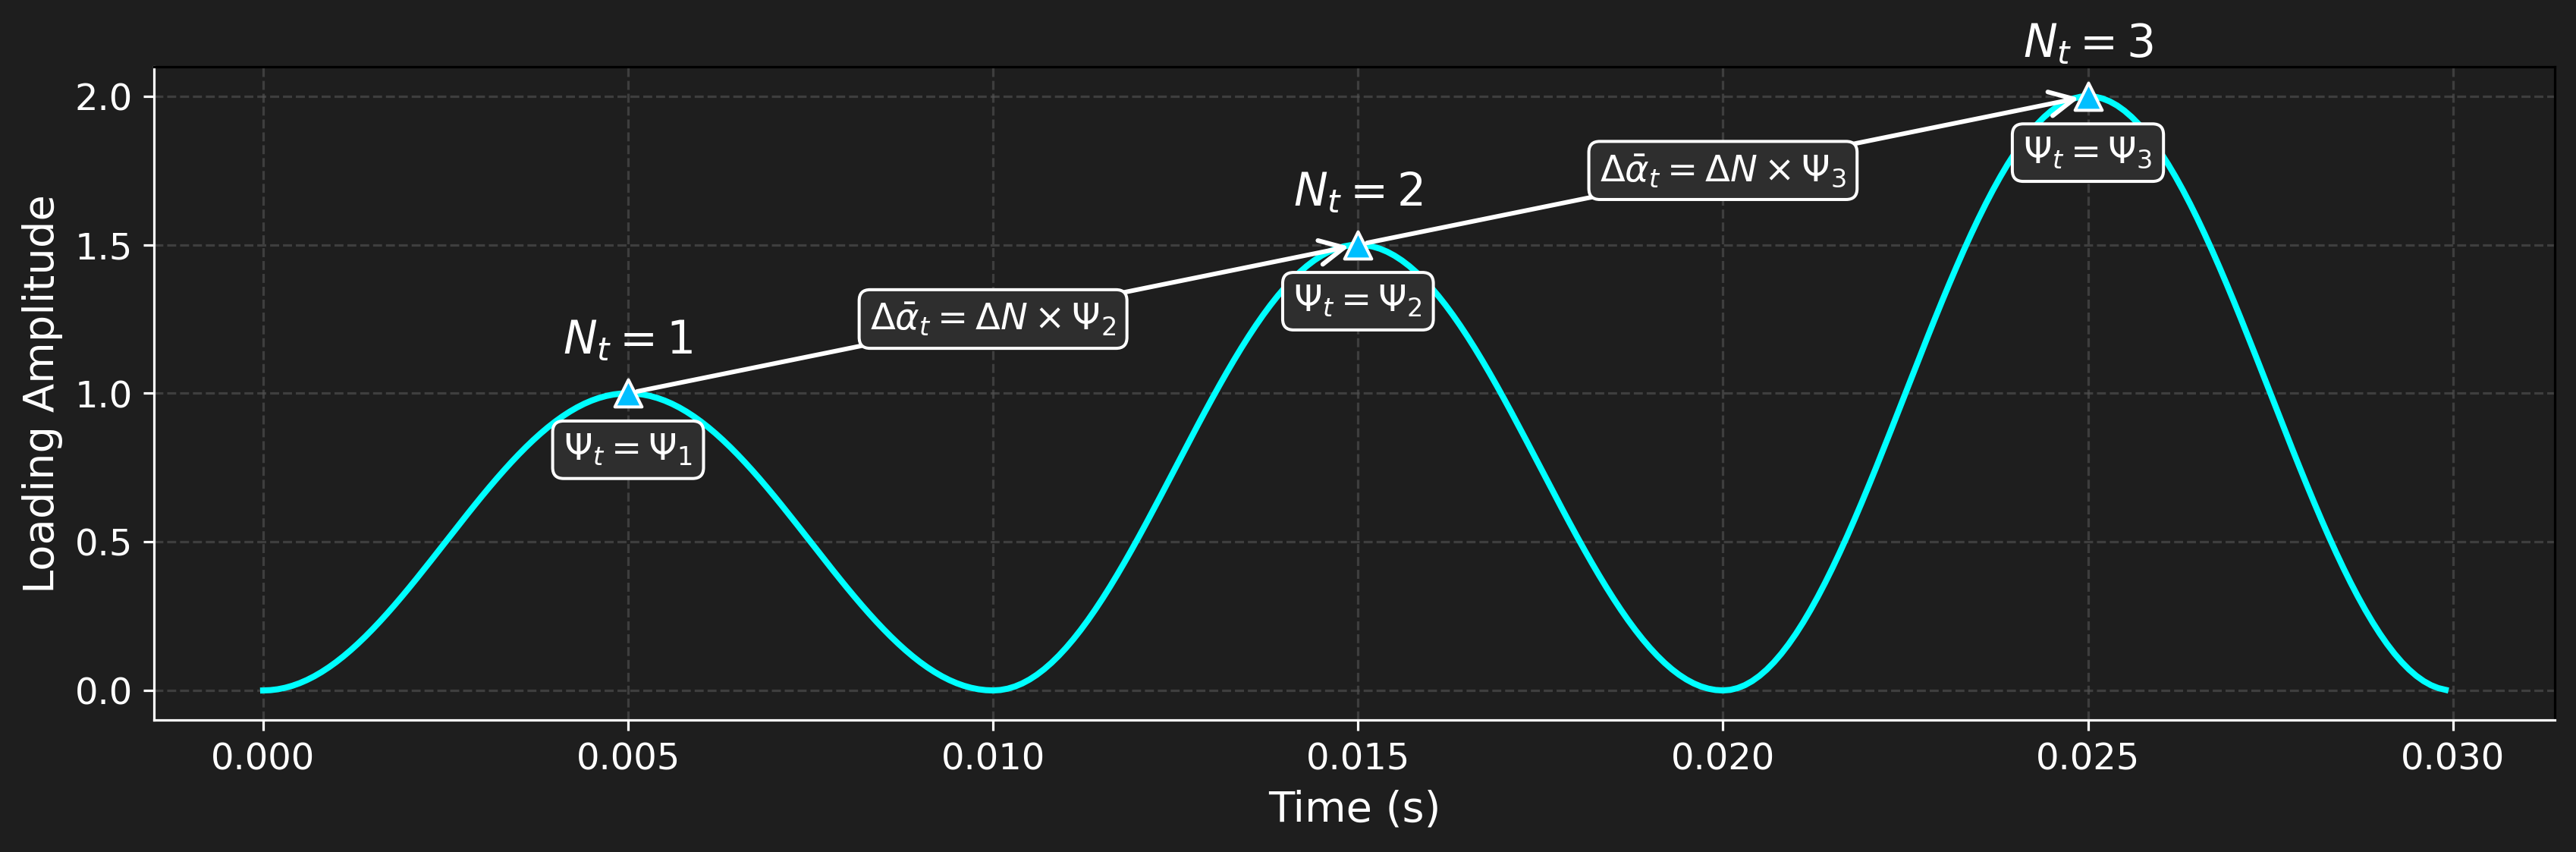

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# —— 資料定義 —— 
period = 0.01
t = np.linspace(0, 3*period, 300, endpoint=False)
amp_schedule = np.array([1.0, 1.5, 2.0])

def load_function_lin(amp_schedule, period, t):
    cycle_idx = np.floor(t/period).astype(int)
    cycle_idx = np.clip(cycle_idx, 0, len(amp_schedule)-1)
    A = amp_schedule[cycle_idx]
    return A * (np.cos(2*np.pi*(t+0.75*period)/period - np.pi/2) + 1) / 2

load = load_function_lin(amp_schedule, period, t)
peak_t = np.array([0.005, 0.015, 0.025])
peak_load = load_function_lin(amp_schedule, period, peak_t)

# —— 繪圖 —— 
fig, ax = plt.subplots(figsize=(12, 4), dpi=288,
                       facecolor='#1e1e1e')      # 深灰底
ax.set_facecolor('#1e1e1e')

# 主要曲線
ax.plot(t, load, color='cyan', linewidth=2, markevery=100)

# 峰值點
ax.scatter(peak_t, peak_load, s=80,
           edgecolor='white', c='deepskyblue', marker='^', zorder=5)

# N_t 標籤
for idx, (x, y) in enumerate(zip(peak_t, peak_load), start=1):
    ax.text(x, y + 0.1, f'$N_t={idx}$',
            fontsize=15, color='white', ha='center', va='bottom')

# Ψ_peak 標籤
bar_alp = [
    r'$\Psi_{t}=\Psi_{1}$',
    r'$\Psi_{t}=\Psi_{2}$',
    r'$\Psi_{t}=\Psi_{3}$',
]
for idx, (x, y) in enumerate(zip(peak_t, peak_load)):
    ax.text(x, y - 0.25, bar_alp[idx],
            fontsize=12, color='white',
            ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.3',
                      facecolor='#2e2e2e', edgecolor='white'))

# 箭頭與 Δα 標籤
alplabel_pos = [0, 0]
delta_alp = [
    r'$\Delta\bar\alpha_t = \Delta N \times \Psi_{2}$',
    r'$\Delta\bar\alpha_t = \Delta N \times \Psi_{3}$'
]
for idx, (t0, t1) in enumerate(zip(peak_t[:-1], peak_t[1:])):
    y0, y1 = peak_load[idx], peak_load[idx+1]
    ax.annotate(
        '',
        xy=(t1, y1),
        xytext=(t0, y0),
        arrowprops=dict(
            arrowstyle='->',
            lw=1.5,
            shrinkA=3,
            shrinkB=3,
            mutation_scale=20,
            color='white'
        )
    )
    mx, my = (t0+t1)/2, (y0+y1)/2
    ax.text(mx + alplabel_pos[idx], my, delta_alp[idx],
            fontsize=12, color='white',
            ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3',
                      facecolor='#2e2e2e', edgecolor='white'))

# 座標軸、網格與字色調整
ax.set_xlabel('Time (s)', fontsize=14, color='white')
ax.set_ylabel('Loading Amplitude', fontsize=14, color='white')
ax.grid(True, linestyle='--', alpha=0.6, color='#555555')
ax.tick_params(labelsize=12, colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.savefig('ICLA1.png',
            facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()


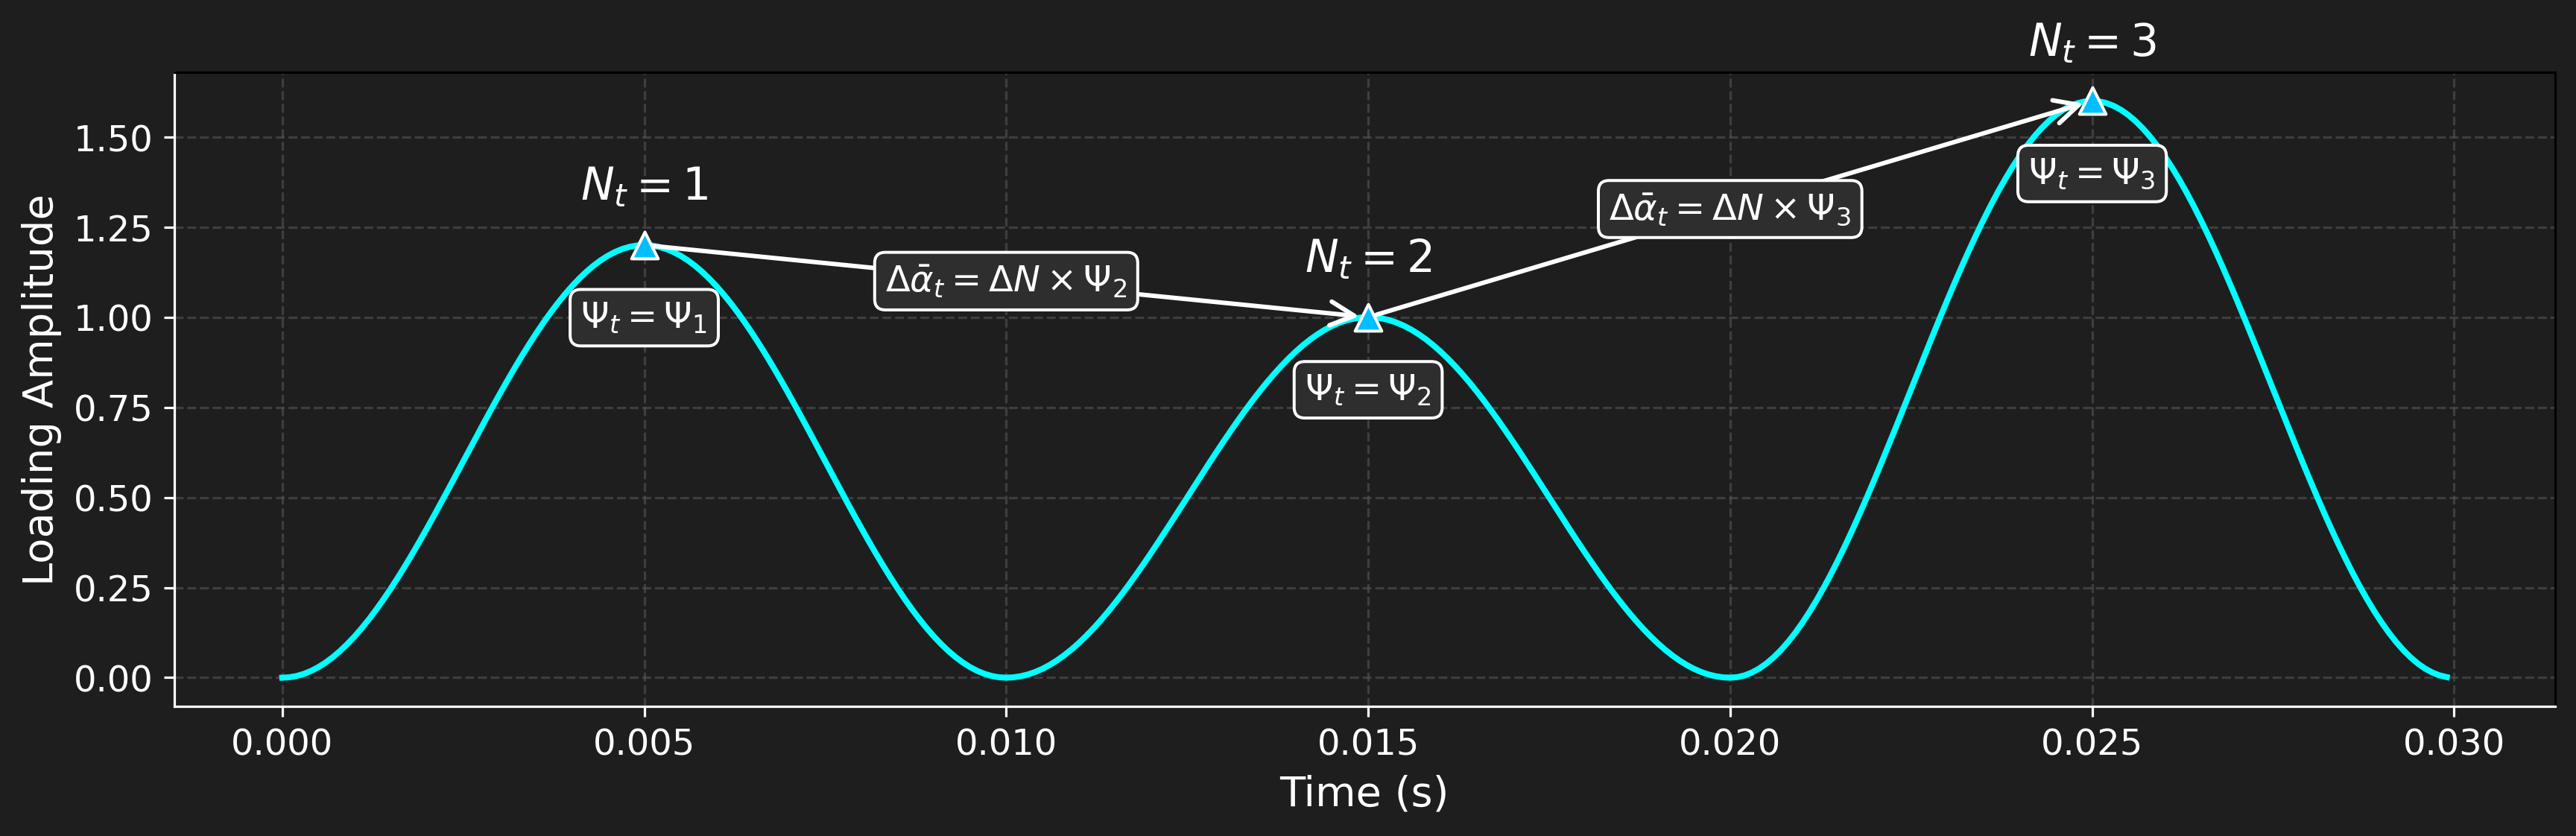

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# —— 資料定義 —— 
period = 0.01
t = np.linspace(0, 3*period, 300, endpoint=False)
amp_schedule = np.array([1.2, 1.0, 1.6])

def load_function_lin(amp_schedule, period, t):
    cycle_idx = np.floor(t/period).astype(int)
    cycle_idx = np.clip(cycle_idx, 0, len(amp_schedule)-1)
    A = amp_schedule[cycle_idx]
    return A * (np.cos(2*np.pi*(t+0.75*period)/period - np.pi/2) + 1) / 2

load = load_function_lin(amp_schedule, period, t)
peak_t = np.array([0.005, 0.015, 0.025])
peak_load = load_function_lin(amp_schedule, period, peak_t)

# —— 繪圖 —— 
fig, ax = plt.subplots(figsize=(12, 4), dpi=288,
                       facecolor='#1e1e1e')      # 深灰底
ax.set_facecolor('#1e1e1e')

# 主要曲線
ax.plot(t, load, color='cyan', linewidth=2, markevery=100)

# 峰值點
ax.scatter(peak_t, peak_load, s=80,
           edgecolor='white', c='deepskyblue', marker='^', zorder=5)

# N_t 標籤
for idx, (x, y) in enumerate(zip(peak_t, peak_load), start=1):
    ax.text(x, y + 0.1, f'$N_t={idx}$',
            fontsize=15, color='white', ha='center', va='bottom')

# Ψ_peak 標籤
bar_alp = [
    r'$\Psi_{t}=\Psi_{1}$',
    r'$\Psi_{t}=\Psi_{2}$',
    r'$\Psi_{t}=\Psi_{3}$',
]
for idx, (x, y) in enumerate(zip(peak_t, peak_load)):
    ax.text(x, y - 0.25, bar_alp[idx],
            fontsize=12, color='white',
            ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.3',
                      facecolor='#2e2e2e', edgecolor='white'))

# 箭頭與 Δα 標籤
alplabel_pos = [0, 0]
delta_alp = [
    r'$\Delta\bar\alpha_t = \Delta N \times \Psi_{2}$',
    r'$\Delta\bar\alpha_t = \Delta N \times \Psi_{3}$'
]
for idx, (t0, t1) in enumerate(zip(peak_t[:-1], peak_t[1:])):
    y0, y1 = peak_load[idx], peak_load[idx+1]
    ax.annotate(
        '',
        xy=(t1, y1),
        xytext=(t0, y0),
        arrowprops=dict(
            arrowstyle='->',
            lw=1.5,
            shrinkA=3,
            shrinkB=3,
            mutation_scale=20,
            color='white'
        )
    )
    mx, my = (t0+t1)/2, (y0+y1)/2
    ax.text(mx + alplabel_pos[idx], my, delta_alp[idx],
            fontsize=12, color='white',
            ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3',
                      facecolor='#2e2e2e', edgecolor='white'))

# 座標軸、網格與字色調整
ax.set_xlabel('Time (s)', fontsize=14, color='white')
ax.set_ylabel('Loading Amplitude', fontsize=14, color='white')
ax.grid(True, linestyle='--', alpha=0.6, color='#555555')
ax.tick_params(labelsize=12, colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.savefig('ICLA2.png',
            facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()
